Let's consider two continous non-independent random variables $X,Y$ with the joint probability density.

$$\frac{dP_{(X,Y)}}{d\lambda_L^2}(x,y) = \frac{\sqrt{15/16}}{2 \pi}e^{-0.5((x-5)^2 + (y-3)^2 + 0.5*(x-5)(y-3))}$$ 

The density above could represent two stocks $X,Y$ which are correlated with each other.

**Exercise 1:**
Calculate the following expressions:
1. The expectation value of $X$. $(E[X] = \int dP_{(X,Y)}(x,y) x)$
2. The expectation value of $Y$. $(E[Y] = \int dP_{(X,Y)}(x,y) y)$
3. Calculate $Var[X] = E[X^2] - (E[X])^2$
4. Calculate $Var[Y] = E[Y^2] - (E[Y])^2$
3. The Covariance which is defined by $Cov[X,Y] = \frac{E[(X-E[X])(Y-E[Y])]}{\sqrt{Var[X]Var[Y]}}$

In [46]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import binom as binomial
from scipy.special import gamma
from scipy import integrate
%matplotlib inline


In [68]:
# 1. Calculate the expectation value of X.
func = lambda x,y: (np.sqrt(15./16)/(2*np.pi))*np.exp(-0.5*((x-5)**2+(y-3)**2+(0.5*(x-5)*(y-3))))

EX = integrate.nquad(lambda x,y: func(x,y) * x, [[-np.infty, np.infty],[-np.infty, np.infty]])
print EX[0]


4.9999999995


In [67]:
# 2. Calculate the expectation value of Y.
EY = integrate.nquad(lambda x,y: func(x,y) * y, [[-np.infty, np.infty],[-np.infty, np.infty]])
print EY[0]


3.00000000044


In [62]:
# 3. Calculate Var[X]
EX2 = integrate.nquad(lambda x,y: func(x,y) * x**2, [[-np.infty, np.infty],[-np.infty, np.infty]])

VarX = EX2[0] - EX[0]**2
print VarX

1.06666667102


In [63]:
# 4. Calculate Var[Y]
EY2 = integrate.nquad(lambda x,y: func(x,y) * y**2, [[-np.infty, np.infty],[-np.infty, np.infty]])

VarY = EY2[0] - EY[0]**2
print VarY

1.06666666358


In [85]:
# 5. Calculate covariance

covnum = integrate.nquad(lambda x,y: func(x,y)*((x - EX[0])*(y - EY[0])), 
                         [[-np.infty, np.infty],[-np.infty, np.infty]])[0]
covXY = covnum / np.sqrt(VarX*VarY)
covXY



-0.24999999940988013

**Exercise 2:**
    
Calculate and plot the marginal probability density defined by 
$$\frac{dP_X}{d\lambda_L}(x) = \int_{y = - \infty}^{y = \infty} d\lambda_L(y) \frac{dP_{(X,Y)}}{d\lambda_L^2}(x,y)$$

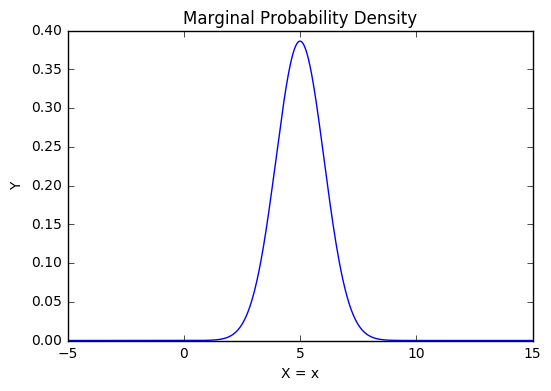

In [87]:


marprobx = lambda x : integrate.quad(lambda y: func(x,y), -np.infty, np.infty)[0] #marginal probability
marproby = lambda y : integrate.quad(lambda x: func(x,y), -np.infty, np.infty)[0] #marginal probability
X = np.arange(-5,15.01, 0.01)
funcX = np.array([marprobx(x) for x in X])
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(X,funcX)
ax.set_ylabel('Y')
ax.set_title('Marginal Probability Density')
ax.set_xlabel('X = x')


**Exercise 3:**

* Calculate the conditional probability $P(Y<3 | X>5) = \frac{P(Y<3 \cap X>5)}{P(X>5)}$. 
* If you use this model to model two stocks and use the result from exercise 1 how could you interpret the conditional expectation value?

In [83]:
denom = integrate.nquad(lambda x,y: func(x,y), [[5, np.infty],[-np.infty, np.infty]])[0]
numer = integrate.nquad(lambda x,y: func(x,y), [[5, np.infty],[-np.infty, 3]])[0]

conprob = numer/denom
print conprob

0.580430623256
